In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/usdrub.csv', parse_dates=['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5323 entries, 0 to 5322
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    5323 non-null   datetime64[ns]
 1   open    5323 non-null   float64       
 2   high    5323 non-null   float64       
 3   low     5323 non-null   float64       
 4   close   5323 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 208.1 KB


In [ ]:
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df.tail()

,date,open,high,low,close,year,month,dow
5318,2021-11-29,74.8000,75.2125,74.2400,74.25,2021,11,0
5319,2021-11-30,74.6900,75.1025,74.2250,74.33,2021,11,1
5320,2021-12-01,74.2500,74.2500,73.7025,73.90,2021,12,2
5321,2021-12-02,74.5900,74.5900,73.5100,73.63,2021,12,3
5322,2021-12-03,73.7675,73.8600,73.2675,73.63,2021,12,4


In [ ]:
df_dt = df[df.date < '2021-12-01']
df_dt = df_dt[['year', 'month', 'close']]
df_dt.tail()

,year,month,close
5315,2021,11,74.79
5316,2021,11,74.89
5317,2021,11,75.43
5318,2021,11,74.25
5319,2021,11,74.33


In [ ]:
df_dt = df_dt.groupby(by=['year', 'month']).last()
df_dt.tail()

close
year month        
2021 7      72.950
     8      73.205
     9      72.720
     10     70.795
     11     74.330

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


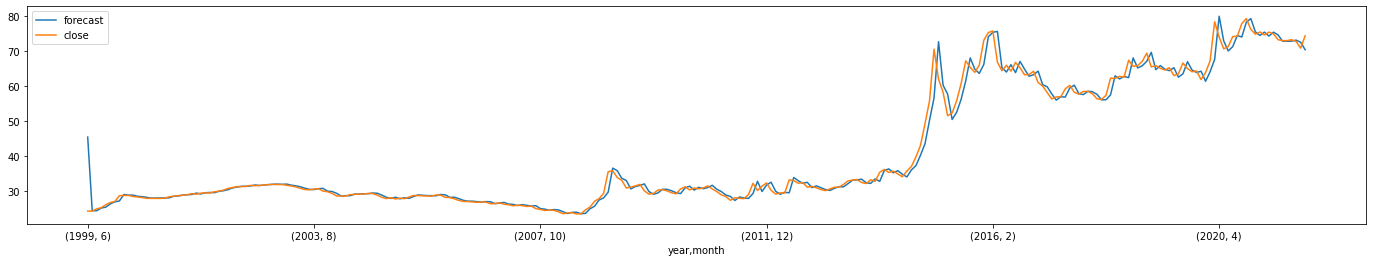

In [ ]:
model = sm.tsa.ARIMA(df_dt, order=(2, 0, 1)).fit()
gr = model.plot_predict()
gr.set_figwidth(24)

In [ ]:
pred = model.forecast()
pred

(array([74.75873058]),
 array([2.08516088]),
 array([[70.67189035, 78.84557081]]))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


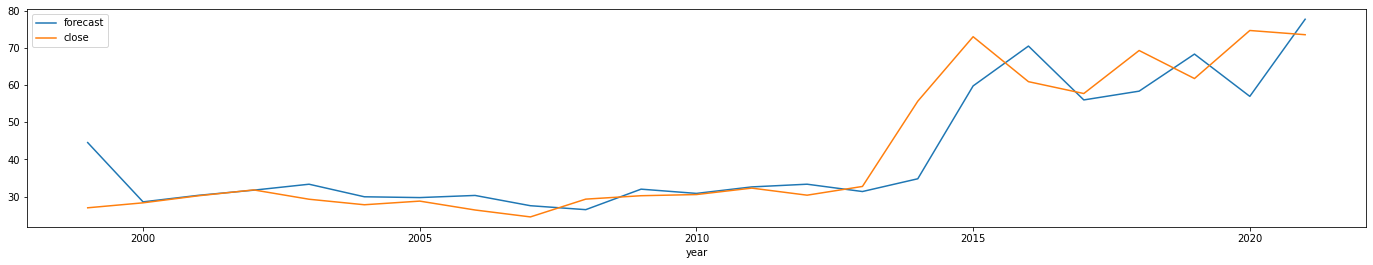

In [ ]:
df_dt = df[['year', 'close']]
df_dt = df_dt.groupby('year').last()
model = sm.tsa.ARIMA(df_dt, order=(2, 0, 1)).fit()
gr = model.plot_predict()
gr.set_figwidth(24)

In [ ]:
pred = model.forecast()
pred

(array([65.62629775]),
 array([7.57897147]),
 array([[50.77178664, 80.48080887]]))